# CSE4502 Midterm

## Problem 1 (100 points) Automatic Coronavirus Test Kits

The fast automatic test kits lab is asking for help. The lab already developed a fast coronavirus test kit that can automate the testing of coronavirus. What they need help with is to improve the performance of their test kit in terms of recall and precision.

The test kit can automatically take 25 different measurements. The reading of the first measurement x1 is categorical. The rest of the readings x2 to x25 are numerical.

The lab provided us a training set of 30, 000 samples, and a test set of 10, 000 samples. The data sets are in the form of .csv files. The file names are train.csv and test.csv respectively. In both data sets, the last column y is the label of a sample, where value 1 means positive, and value 0 means negative. A positive label indicates the sample is from a patient infected
by the coronavirus.

Our job is to use the training data to train a classifier that can achieve 100% recall and at least 70% of precision. Once we can convinced that we have a classifier that can achieve this goal, we use the test set to test whether we indeed can achieve these requirements in the test set.


***Save the code in midterm.ipynb and submit it to HuskyCT by the deadline.
The submission should include the following steps. Whenever applicable, use
random state=42.***

1. Read train.csv
2. Obtain the high level information of the dataset.
3.  Plot histograms of all the attributes.
4. Handle both categorical and numerical attributes. And use pipelines to prepare data for later steps.
5.  Report the importance of each attribute by using the random forest classifier
6.  Train 3 different promising classifiers in terms of accuracy, and use these classifiers to obtain a soft-voting classifier.
    * Report the accuracy of each of these classifiers.
    * Use 3-fold cross-validation for this step
7. Explore the above 4 classifiers on the recall and precision trade-off and find a classifier that suits our purpose the most.
    * Plot the ROC curves for these classifiers.
    * Calculate the ROC AUC scores for these classifiers.
    * Plot the precision versus recall for these classifiers
    * Find out the precision for each classifier when the recall is 1, and use these values to choose the classifier for our purpose.
8. Fine-tune the hyperparameters for the chosen classifier in terms of recall.
9. Use the best hyperparameters obtain above for the classifier to obtain the precision value when the recall is 1 using 3-fold cross-validation. If the precision is well above our target 0.70, go to the last step.
10. Use the test data from test.csv to check whether we can achieve the proposed requirement on recall and precision.

### 1. Reading the train.csv

In [1]:
import numpy as np
import os
import pandas as pd

np.random.seed(42)

***I'm chosing to load the test.csv in now so as to do preprocessing with both set simultaneously so as to not miss this later when the test data is needed. We will not plot histograms of any test.csv attributes, but will perform OneHotEncoding on x1***

In [2]:
# attributes = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 
#               'x10','x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 
#               'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'y']

# loading in
# COVID_19_train = pd.read_csv('train.csv', sep=',', names=attributes, header=None)
COVID_19_train = pd.read_csv('train.csv')
COVID_19_test = pd.read_csv('test.csv')

C19_train = pd.DataFrame(COVID_19_train)
C19_test = pd.DataFrame(COVID_19_test)

C19_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
0,3.0,-0.183355,-4.634184,1.184842,5.470261,3.672736,-4.030212,2.689942,8.962724,2.484879,...,-15.994611,15.024532,23.204973,2.528437,8.962604,0.266541,-1.383385,-1.029273,1.711146,1.0
1,2.0,1.643093,0.232917,-3.235598,-0.082242,-6.190242,-2.308474,-0.968020,-5.374390,2.460543,...,22.711908,45.220479,-0.635627,22.675962,32.937243,-1.082314,0.571426,-0.063689,-3.122653,1.0
2,1.0,0.812938,0.095642,-1.170322,-1.808930,-2.618295,1.613534,-5.186820,-0.011963,3.381312,...,-3.333037,-8.586271,-3.326587,5.033094,-5.385510,-1.281024,-0.788055,0.505804,-0.891985,0.0
3,2.0,-0.250723,0.011880,2.086732,-2.476512,-0.265453,4.399695,-0.159362,0.674294,-7.503565,...,4.438590,9.183342,7.087640,25.453062,12.087652,-0.613746,0.141558,-0.206084,0.538862,0.0
4,2.0,1.215325,1.675581,2.193322,2.983158,0.007759,2.983193,2.731582,2.418476,-6.947729,...,-21.198210,19.839208,9.945454,13.003429,-10.114149,-0.111361,-0.954487,0.825140,1.437519,1.0
5,3.0,-0.586428,1.458492,2.502627,5.459522,-0.464288,-3.323099,12.077233,-5.563451,3.322810,...,-0.711339,21.769618,-0.028254,34.139830,16.388355,1.094223,-0.006528,-0.308278,-0.269354,1.0
6,3.0,0.100524,-1.388749,-2.665432,-6.028741,2.039358,4.406920,-8.420067,4.183515,7.966043,...,-0.759000,20.886151,20.667753,-5.444716,-9.691848,0.106968,0.289668,0.463266,0.544190,1.0
7,3.0,-0.807155,-0.410471,5.684534,-5.024604,-1.326458,1.545482,12.270015,4.611056,-0.723930,...,3.904253,2.738676,-18.404293,29.809074,45.261686,-0.390345,-1.810121,0.363185,-0.118386,1.0
8,3.0,-0.336882,-0.588544,-1.669453,-0.652405,-6.343050,-1.139569,-0.767075,-3.199307,2.588771,...,-6.440363,5.707824,27.422301,-12.839884,-29.174395,1.602833,1.263823,0.258739,0.755062,1.0
9,2.0,0.988316,-0.248479,0.837765,1.387419,-6.525173,-15.473819,2.243488,5.006446,4.125233,...,-25.140891,17.417926,-19.726156,-34.530741,28.621006,-2.476262,0.437255,0.228907,-0.213761,1.0


### 2. Obtaining some higher level information

Trying to get an idea of what the our input training set looks like

In [3]:
C19_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
x1     30000 non-null float64
x2     30000 non-null float64
x3     30000 non-null float64
x4     30000 non-null float64
x5     30000 non-null float64
x6     30000 non-null float64
x7     30000 non-null float64
x8     30000 non-null float64
x9     30000 non-null float64
x10    30000 non-null float64
x11    30000 non-null float64
x12    30000 non-null float64
x13    30000 non-null float64
x14    30000 non-null float64
x15    30000 non-null float64
x16    30000 non-null float64
x17    30000 non-null float64
x18    30000 non-null float64
x19    30000 non-null float64
x20    30000 non-null float64
x21    30000 non-null float64
x22    30000 non-null float64
x23    30000 non-null float64
x24    30000 non-null float64
x25    30000 non-null float64
y      30000 non-null float64
dtypes: float64(26)
memory usage: 6.0 MB


In [4]:
# Gathering info to see how many possible options of categorial x1 there are
C19_train["x1"].value_counts()

1.0    13429
3.0     9007
2.0     7564
Name: x1, dtype: int64

In [5]:
C19_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.852600,0.049272,0.155542,0.264086,0.327877,0.467856,0.540467,0.645905,0.772064,0.855704,...,1.607029,1.643243,1.738432,1.912739,2.122779,-0.008287,-0.003695,-0.014306,-0.007142,0.500700
std,0.852153,0.790037,1.586722,2.370197,3.182403,3.924575,4.748936,5.538706,6.337332,7.163032,...,12.645386,13.398864,14.179822,15.058734,15.889472,0.996894,0.997866,0.998303,1.002864,0.500008
min,1.000000,-4.127232,-7.546048,-11.394922,-15.703917,-17.282928,-21.532381,-29.281607,-30.208977,-34.958885,...,-65.028714,-69.516983,-69.663771,-73.657652,-72.907504,-3.928834,-3.994068,-4.192774,-3.803546,0.000000
25%,1.000000,-0.422199,-0.775418,-1.125385,-1.530502,-1.814194,-2.246759,-2.614270,-2.988377,-3.323687,...,-5.778436,-6.161997,-6.549858,-6.848749,-7.156391,-0.681687,-0.680071,-0.684913,-0.686482,0.000000
50%,2.000000,0.032569,0.141492,0.254399,0.329104,0.470329,0.495226,0.630812,0.796000,0.836376,...,1.542984,1.705728,1.776420,1.898707,2.144885,-0.009180,-0.003500,-0.013049,-0.004206,1.000000
75%,3.000000,0.503805,1.076679,1.638515,2.165261,2.768946,3.316882,3.912253,4.491845,5.015648,...,8.983422,9.508459,10.020857,10.665602,11.308316,0.666875,0.665890,0.653100,0.667001,1.000000
max,3.000000,3.768093,7.606813,12.314023,14.647326,23.133919,24.032719,27.760556,32.032490,36.809509,...,66.652373,59.753684,79.408555,68.661508,77.972068,3.581391,4.616384,3.815528,4.014202,1.000000


In [6]:
C19_train.y  # Classification either positive or negative for coronavirus

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       0.0
12       1.0
13       0.0
14       0.0
15       0.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       0.0
23       1.0
24       0.0
25       1.0
26       1.0
27       0.0
28       1.0
29       1.0
        ... 
29970    1.0
29971    0.0
29972    0.0
29973    1.0
29974    0.0
29975    0.0
29976    0.0
29977    0.0
29978    0.0
29979    1.0
29980    1.0
29981    0.0
29982    1.0
29983    0.0
29984    0.0
29985    1.0
29986    1.0
29987    0.0
29988    0.0
29989    0.0
29990    0.0
29991    0.0
29992    1.0
29993    1.0
29994    0.0
29995    0.0
29996    0.0
29997    1.0
29998    0.0
29999    0.0
Name: y, Length: 30000, dtype: float64

In [7]:
C19_train.y.dtype

dtype('float64')

In [8]:
C19_train.x1 # Some categorical data, in first column

0        3.0
1        2.0
2        1.0
3        2.0
4        2.0
5        3.0
6        3.0
7        3.0
8        3.0
9        2.0
10       1.0
11       1.0
12       3.0
13       2.0
14       1.0
15       1.0
16       3.0
17       3.0
18       2.0
19       2.0
20       3.0
21       2.0
22       1.0
23       2.0
24       1.0
25       2.0
26       3.0
27       1.0
28       2.0
29       2.0
        ... 
29970    3.0
29971    1.0
29972    1.0
29973    3.0
29974    1.0
29975    2.0
29976    1.0
29977    1.0
29978    1.0
29979    2.0
29980    3.0
29981    1.0
29982    3.0
29983    1.0
29984    1.0
29985    3.0
29986    2.0
29987    1.0
29988    1.0
29989    1.0
29990    1.0
29991    2.0
29992    3.0
29993    3.0
29994    1.0
29995    1.0
29996    1.0
29997    3.0
29998    1.0
29999    1.0
Name: x1, Length: 30000, dtype: float64

### 3. Plot histograms of all the attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B29E85A470>,
      dtype=object)

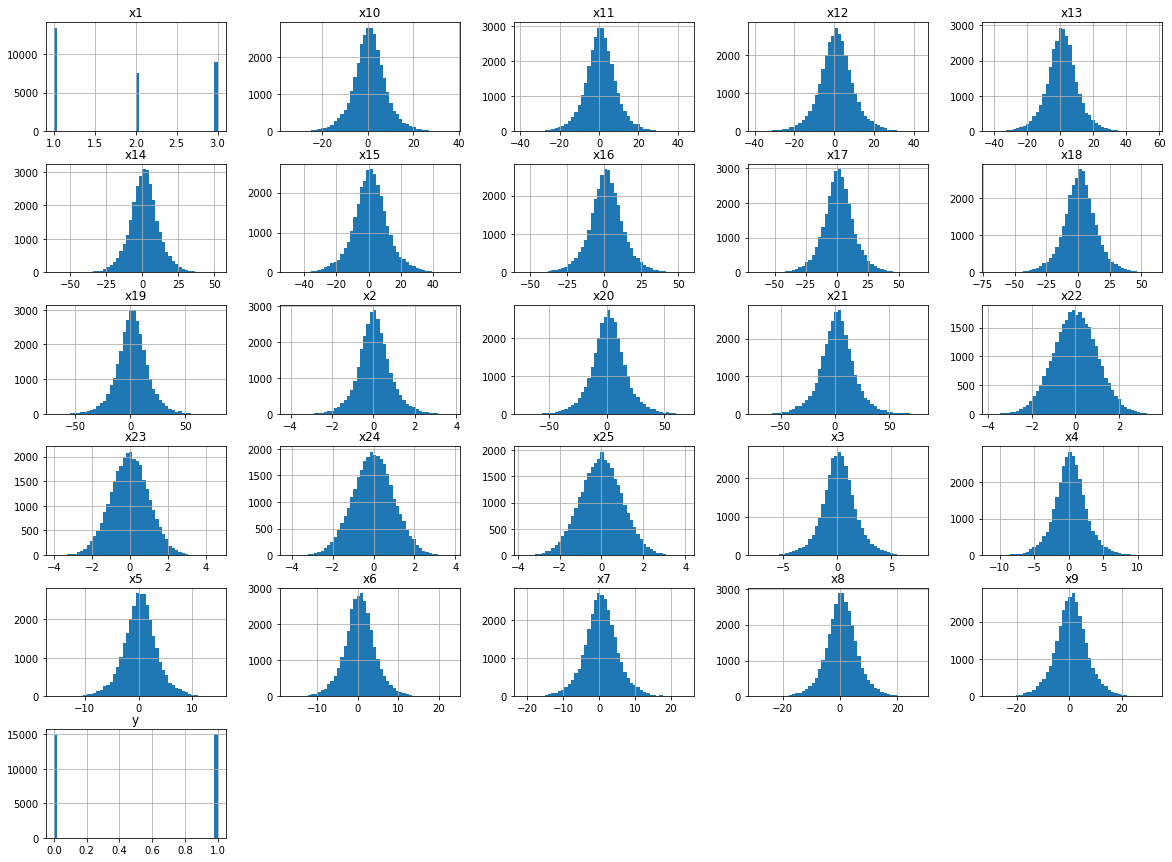

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
C19_train.hist(bins=50, figsize=(20,15))

In [10]:
X_train_pre = C19_train.iloc[: , 0:25]   # transform data array 
X_test = C19_test.iloc[: , 0:25]
X_train_pre.head

<bound method NDFrame.head of         x1        x2        x3        x4        x5        x6         x7  \
0      3.0 -0.183355 -4.634184  1.184842  5.470261  3.672736  -4.030212   
1      2.0  1.643093  0.232917 -3.235598 -0.082242 -6.190242  -2.308474   
2      1.0  0.812938  0.095642 -1.170322 -1.808930 -2.618295   1.613534   
3      2.0 -0.250723  0.011880  2.086732 -2.476512 -0.265453   4.399695   
4      2.0  1.215325  1.675581  2.193322  2.983158  0.007759   2.983193   
5      3.0 -0.586428  1.458492  2.502627  5.459522 -0.464288  -3.323099   
6      3.0  0.100524 -1.388749 -2.665432 -6.028741  2.039358   4.406920   
7      3.0 -0.807155 -0.410471  5.684534 -5.024604 -1.326458   1.545482   
8      3.0 -0.336882 -0.588544 -1.669453 -0.652405 -6.343050  -1.139569   
9      2.0  0.988316 -0.248479  0.837765  1.387419 -6.525173 -15.473819   
10     1.0  0.492496 -0.342664 -2.018667 -3.226724 -1.563788  -1.297202   
11     1.0 -0.044271  0.102832  2.559110  2.207415  2.384315   1.57526

In [11]:
y_train = C19_train.iloc[:,-1]
y_test = C19_test.iloc[:,-1]
print(y_train)

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       0.0
12       1.0
13       0.0
14       0.0
15       0.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       0.0
23       1.0
24       0.0
25       1.0
26       1.0
27       0.0
28       1.0
29       1.0
        ... 
29970    1.0
29971    0.0
29972    0.0
29973    1.0
29974    0.0
29975    0.0
29976    0.0
29977    0.0
29978    0.0
29979    1.0
29980    1.0
29981    0.0
29982    1.0
29983    0.0
29984    0.0
29985    1.0
29986    1.0
29987    0.0
29988    0.0
29989    0.0
29990    0.0
29991    0.0
29992    1.0
29993    1.0
29994    0.0
29995    0.0
29996    0.0
29997    1.0
29998    0.0
29999    0.0
Name: y, Length: 30000, dtype: float64


In [12]:
X_train_pre.shape

(30000, 25)

In [13]:
y_train.shape

(30000,)

In [14]:
X_train_pre.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25'],
      dtype='object')

### 4. Prepare Numerical and Categorial data through pipelining of both the traininng and testing set

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
# from sklearn.impute import SimpleImputer
# shouldn't need SimpleImputer or Combined Attributes Adder created in 
# Ch02 end to end ML project

X_train_num = X_train_pre.drop("x1", axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [17]:
X_train_num_tr

array([[-0.29445543, -3.01867991,  0.388479  , ..., -1.38266321,
        -1.0167101 ,  1.71340928],
       [ 2.01743404,  0.04876503, -1.47656173, ...,  0.57636043,
        -0.04946777, -3.10666585],
       [ 0.96663571, -0.03775175, -0.60519514, ..., -0.78605085,
         0.5210024 , -0.88233162],
       ...,
       [ 0.68213   ,  1.03560596, -0.39014087, ...,  1.04232486,
        -0.08409703,  0.79671719],
       [ 0.10837612, -0.02769797, -0.67632665, ...,  0.81239487,
        -0.23472567,  0.3170894 ],
       [-1.24786564, -0.34855752,  0.25224832, ..., -0.34707399,
         0.11676318, -0.44206346]])

In [18]:
from sklearn.compose import ColumnTransformer

# columns of both test and train set are same
num_attribs = list(X_train_num)
cat_attribs = ["x1"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(X_train_pre)

### 5. Use RandomForestClassifier, report the importance of each attribute

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF_CLF = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100)
RF_CLF.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
from sklearn.model_selection import cross_val_score 
cross_val_score(RF_CLF, X_train, y_train, cv=3, scoring="accuracy")

array([0.9593, 0.963 , 0.958 ])

In [21]:
feature_importance = list(zip(RF_CLF.feature_importances_, X_train_pre.columns))
feature_importance.sort(reverse=True)

In [22]:
for name, score in zip(X_train_pre.columns, RF_CLF.feature_importances_):
    print(name, score)

x1 0.04368001323313353
x2 0.0410008639899888
x3 0.03689951895427097
x4 0.034752991086270626
x5 0.022971267239576466
x6 0.023092250925179216
x7 0.025154430965476367
x8 0.029318318501594512
x9 0.025326133478628988
x10 0.026756930305718525
x11 0.017296026596624135
x12 0.02651266958792644
x13 0.023101683504041914
x14 0.02243973238768359
x15 0.02261731683317337
x16 0.01782552054928475
x17 0.020999857733033433
x18 0.030619482684522022
x19 0.020746485628934972
x20 0.04173630815170659
x21 0.006420609116582483
x22 0.006215120582456871
x23 0.006156396361313113
x24 0.005991483138213072
x25 0.2673993217100404


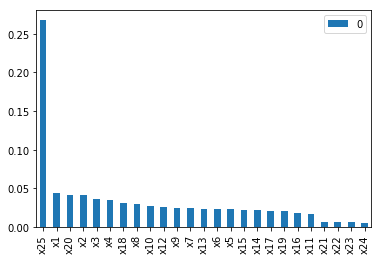

In [23]:
pd.DataFrame(feature_importance, index=[x for (_,x) in feature_importance]).plot(kind = 'bar')

***It appears that x25 is the most important feature by a long shot here***

### 6. Train 3 Classifier in terms of accuracy, then obtain a soft-margin classifier

1st classifier - Extra-Trees

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
  
XT_clf = ExtraTreesClassifier(random_state=42)

In [26]:
XT_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [27]:
cross_val_score(XT_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9664, 0.9681, 0.9681])

2. SVC Classifier

In [28]:
from sklearn.svm import SVC

SVC_clf = SVC(gamma="auto", probability=True, random_state=42)
SVC_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
cross_val_score(SVC_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9868, 0.9878, 0.9881])

3. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
cross_val_score(RF_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9593, 0.963 , 0.958 ])

Combining and making a soft-margin voting classifier

In [32]:
estimators = [XT_clf, SVC_clf, RF_clf]

In [33]:
[estimator.score(X_train, y_train) for estimator in estimators]

[1.0, 0.9929, 1.0]

In [34]:
from sklearn.ensemble import VotingClassifier

In [35]:
my_estimators = [
    ("extra_trees_clf", XT_clf),
    ("svc_clf", SVC_clf),
    ("random_forest_clf", RF_clf),
]

In [36]:
voting_clf = VotingClassifier(my_estimators)

In [37]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('extra_trees_clf',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                    

In [38]:
voting_clf.score(X_train, y_train)

1.0

In [39]:
[estimator.score(X_train, y_train) for estimator in voting_clf.estimators_]

[1.0, 0.9929, 1.0]

In [40]:
voting_clf.voting = "soft"

In [41]:
voting_clf.score(X_train, y_train)

1.0

### 7. Explore 4 classifier in 6. on recall and precision trade-off and find the best classifier for our purposes

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

**Extra Trees ROC Curve, and ROC AUC Score**

In [43]:
y_probas_XT = cross_val_predict(XT_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

y_scores_XT = y_probas_XT[:, 1]
fpr_XT, tpr_XT, thresholds_XT = roc_curve(y_train, y_scores_XT)

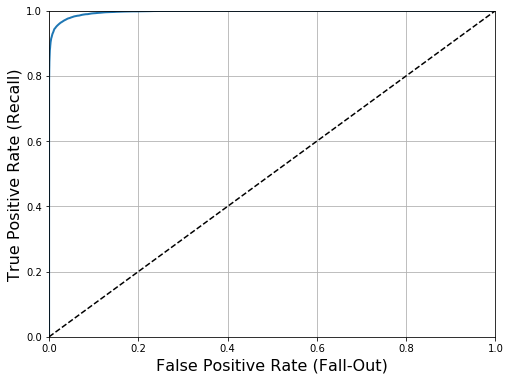

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

#subplot dotted lines and dots from textbook
plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr_XT, tpr_XT, "Extra Tree Classifier")

plt.show()

In [45]:
roc_auc_score(y_train, y_scores_XT)

0.9963434039441829

In [46]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

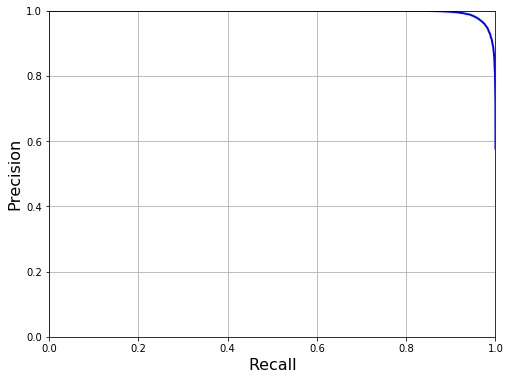

In [47]:
precisions_XT, recalls_XT, thresholds_XT = precision_recall_curve(y_train, y_scores_XT)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_XT, recalls_XT)

plt.show()

In [48]:
threshold_100_recall_XT = thresholds_XT[np.argmax(recalls_XT >= 1.00)]

In [49]:
threshold_100_recall_XT

0.01

In [50]:
y_train_pred_100_XT = (y_scores_XT >= threshold_100_recall_XT)

In [51]:
precision_score(y_train, y_train_pred_100_XT)

0.5770870951630873

**SVC ROC Curve, and ROC AUC Score**

In [52]:
y_probas_SVC = cross_val_predict(SVC_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

y_scores_SVC = y_probas_SVC[:, 1]
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_train, y_scores_SVC)

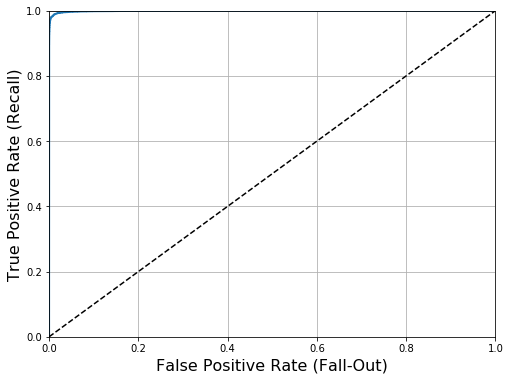

In [53]:
plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr_SVC, tpr_SVC, "SVC Classifier")

plt.show()

In [54]:
roc_auc_score(y_train, y_scores_SVC)

0.9991270671779404

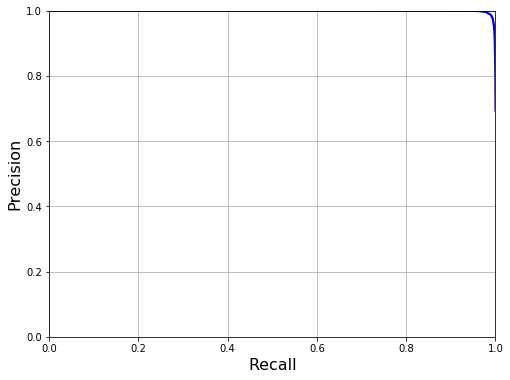

In [55]:
precisions_SVC, recalls_SVC, thresholds_SVC = precision_recall_curve(y_train, y_scores_SVC)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_SVC, recalls_SVC)

plt.show()

In [56]:
threshold_100_recall_SVC = thresholds_SVC[np.argmax(recalls_SVC >= 1.00)]

In [57]:
threshold_100_recall_SVC

0.00021397008078930224

In [58]:
y_train_pred_100_SVC = (y_scores_SVC >= threshold_100_recall_SVC)

In [59]:
precision_score(y_train, y_train_pred_100_SVC)

0.6921162972860895

**Random Forest ROC Curve, and ROC AUC Score**

In [60]:
y_probas_RF = cross_val_predict(RF_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

y_scores_RF = y_probas_RF[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train, y_scores_RF)

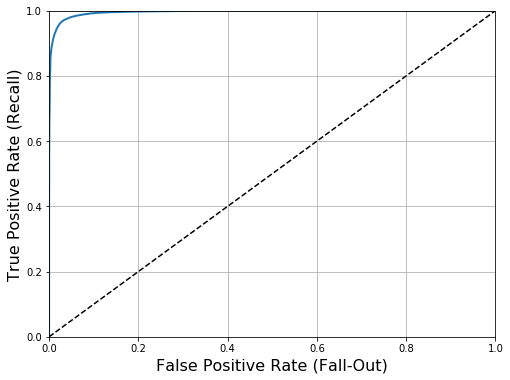

In [61]:
plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest Classifier")

plt.show()

In [62]:
roc_auc_score(y_train, y_scores_RF)

0.9954453444062084

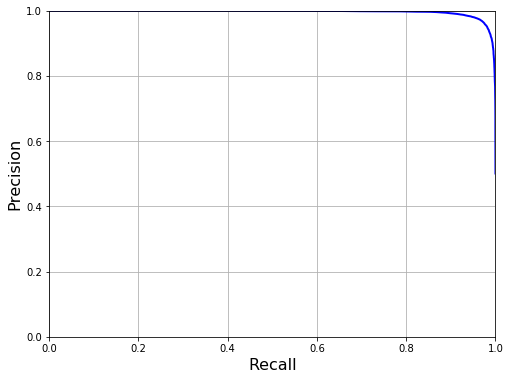

In [63]:
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_train, y_scores_RF)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_RF, recalls_RF)

plt.show()

In [64]:
threshold_100_recall_RF = thresholds_RF[np.argmax(recalls_RF >= 1.00)]

In [65]:
threshold_100_recall_RF

0.0

In [66]:
y_train_pred_100_RF = (y_scores_RF >= threshold_100_recall_RF)

In [67]:
precision_score(y_train, y_train_pred_100_RF)

0.5007

**Voting Classifier ROC Curve, and ROC AUC Score**

In [68]:
y_probas_VT = cross_val_predict(voting_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

y_scores_VT = y_probas_VT[:, 1]
fpr_VT, tpr_VT, thresholds_VT = roc_curve(y_train, y_scores_VT)

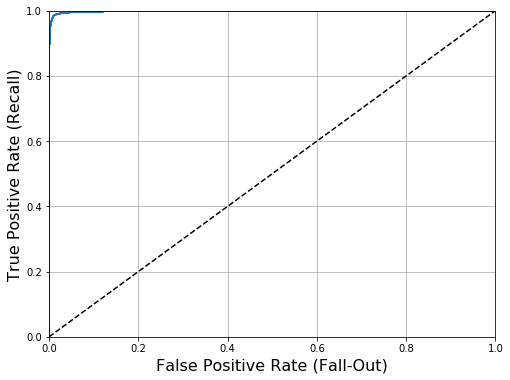

In [69]:
plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr_VT, tpr_VT, "Voting Classifier")

plt.show()

In [70]:
roc_auc_score(y_train, y_scores_VT)

0.9985618505145604

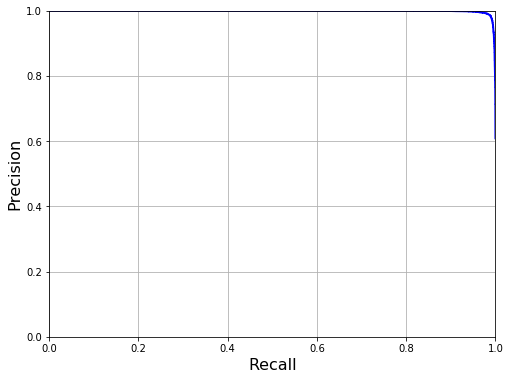

In [71]:
precisions_VT, recalls_VT, thresholds_VT = precision_recall_curve(y_train, y_scores_VT)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_VT, recalls_VT)

plt.show()

In [72]:
threshold_100_recall_VT = thresholds_VT[np.argmax(recalls_VT >= 1.00)]

In [73]:
threshold_100_recall_VT

0.0036932853027226062

In [74]:
y_train_pred_100_VT = (y_scores_VT >= threshold_100_recall_VT)

In [75]:
precision_score(y_train, y_train_pred_100_VT)

0.6073262442890066

**It appears that the SVC Classifier is best performing, with roughly a 0.69211 precision at recall=1.00, we will move on and fine tune the hyperparameters for this classifier**

### 8. Fine tune hyperparameters for chosen classifier in terms of recall

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Tuning hyperparameters for SVC kernel='rbf' (default and best performing kernel)
# C and gamma are only tunable values, performing grid search across this set

# list of values to search across for C and gamma respectable
# C values from 10^-6 to 10^6
# gamma values from 10^-6 to 10^6
Clist = np.logspace(-5,5,num=11)
gammalist = np.logspace(-5,5,num=11)

parameters = {'C':Clist, 'gamma':gammalist}

# secondary param_grid that should run faster than the one above
# param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

Clist2 = np.logspace(-1,3,num=5)
gammalist2 = np.logspace(-4,0,num=5)
param_grid = {'C':Clist2, 'gamma':gammalist2}


grid_search = GridSearchCV(SVC_clf, param_grid, cv=3, n_jobs=-1, verbose=3, refit=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  75 | elapsed:  8.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 16.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.001}

In [79]:
grid_search.best_estimator_

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

### 9. Use best hyperparameters above to find precision, when recall=1

In [80]:
# cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring="precision")

In [81]:
# cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring="recall")

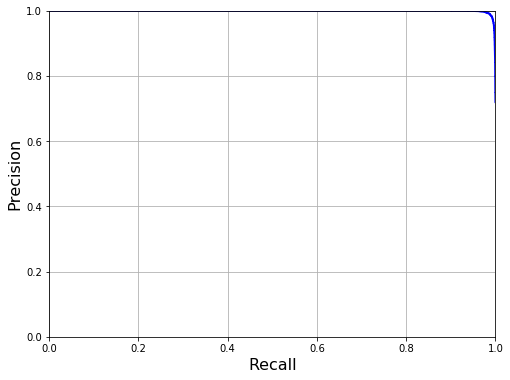

In [82]:
# doing this get an idea, the tuned hyperparameters shouldn't have drastic changes on the graph

y_probas_GS = cross_val_predict(grid_search.best_estimator_, 
                                X_train, y_train, cv=3,
                                method="predict_proba")

y_scores_GS = y_probas_GS[:, 1]

precisions_GS, recalls_GS, thresholds_GS = precision_recall_curve(y_train, y_scores_GS)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_GS, recalls_GS)

plt.show()

In [83]:
threshold_100_recall_GS = thresholds_GS[np.argmax(recalls_GS >= 0.90)]

In [84]:
threshold_100_recall_GS

0.0009406313699467586

In [85]:
y_train_pred_100_GS = (y_scores_GS >= threshold_100_recall_GS)

In [86]:
precision_score(y_train, y_train_pred_100_GS)

0.7185018654931599

### 10. Apply this refined classifier to the test set, test.csv to see if recall and precision scores are achieved

The test.csv was already loaded in, must pipeline it in the same way we did with the training set in part 4

In [87]:
X_test_num = X_test.drop("x1", axis=1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_test_num_tr = num_pipeline.fit_transform(X_test_num)

In [88]:
X_train_num_tr

array([[-0.29445543, -3.01867991,  0.388479  , ..., -1.38266321,
        -1.0167101 ,  1.71340928],
       [ 2.01743404,  0.04876503, -1.47656173, ...,  0.57636043,
        -0.04946777, -3.10666585],
       [ 0.96663571, -0.03775175, -0.60519514, ..., -0.78605085,
         0.5210024 , -0.88233162],
       ...,
       [ 0.68213   ,  1.03560596, -0.39014087, ...,  1.04232486,
        -0.08409703,  0.79671719],
       [ 0.10837612, -0.02769797, -0.67632665, ...,  0.81239487,
        -0.23472567,  0.3170894 ],
       [-1.24786564, -0.34855752,  0.25224832, ..., -0.34707399,
         0.11676318, -0.44206346]])

In [89]:
X_test_num.shape

(10000, 24)

In [90]:
num_attribs = list(X_test_num)
cat_attribs = ["x1"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_test_mod = full_pipeline.fit_transform(X_test)

In [91]:
X_test_mod.shape

(10000, 27)

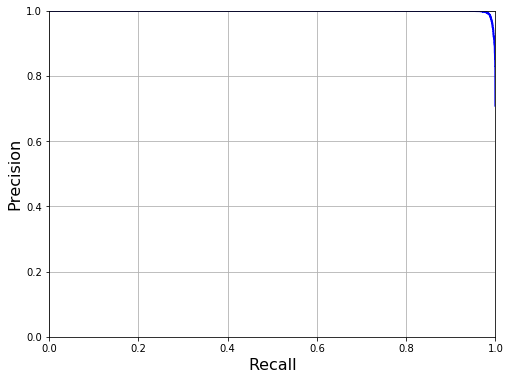

In [92]:
# doing this get an idea, the tuned hyperparameters shouldn't have drastic changes on the graph

y_probas_test = cross_val_predict(grid_search.best_estimator_, 
                                X_test_mod, y_test, cv=3,
                                method="predict_proba")

y_scores_test = y_probas_test[:, 1]

precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test, y_scores_test)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_test, recalls_test)

plt.show()

In [93]:
threshold_100_recall_test = thresholds_test[np.argmax(recalls_test >= 1.00)]

In [94]:
threshold_100_recall_test 

0.0013033625695527216

In [95]:
y_test_pred_100 = (y_scores_test >= threshold_100_recall_test)

In [96]:
precision_score(y_test, y_test_pred_100)

0.7072443181818182

***It seems that based on our best performing SVC Classifier with fine tuned C and gamma hyperparamerters on the training set, the classifier performed up to the desired constraints of recall = 100% and precision = 70% when applied to a pipelined test set. The precision score at recall = 100% is 70.72%, just 0.72% over our desired performance. These are some difficult constraints with recall = 100% to attempt to flag all positive test cases of the COVID-19. We are trying to stop a life-disrupting global pandemic after all, and catch all the true positives.
南無阿彌陀佛***

This has been a fun midterm, I would be curious as to where this data set came from, and if it's a real dataset, which seems unlikely, or some other set but modified. -Eric